In [ ]:
#| default_exp maps

# EVCI maps

> **API**: The API includes functions to read shapfiles and render them. The rendered outputs can be saved as images.

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#|export

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import shapely
import os

import pandas as pd
import tqdm

from evci_tool.config import *

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#|export

def show_map(urban_area:str, request_id=""):
    "This function reads corresponding shape file and plots the points"
    
    m,s,t,g,p,INPUT_PATH,OUTPUT_PATH = setup_and_read_data(urban_area, request_id=request_id)

    #s_df = gpd.read_file(INPUT_PATH + 'shape_files/' + urban_area + '.shp')
    data = get_grid_data(s,g)

    data['geometry'] = [shapely.geometry.Point(xy) for xy in 
                        zip(data['Longitude'],data['Latitude'])]

    s_df = gpd.GeoDataFrame(data, geometry=data['geometry'])
    s_df = s_df.reset_index(drop=True)

    data['geometry'] = [shapely.geometry.Point(xy) for xy in 
                        zip(data['Transformer longitude'],data['Transformer latitude'])]

    g_df = gpd.GeoDataFrame(data, geometry=data['geometry'])
    g_df = g_df.reset_index(drop=True)

    # plot the grid and the shapefiles
    base = s_df.plot(markersize=100, alpha=0.4,
                     legend = True, label = "Potential sites", figsize=(12,8))
    
    g_df.plot(ax=base, markersize=20, legend=True, label="Nearest Transformer")

    plt.legend()
    plt.tight_layout()

`Arguments`:

`urban_area`: a string describing the urban area to be analyzed
`request_id`: a string with session/request ID

`Returns`:

None

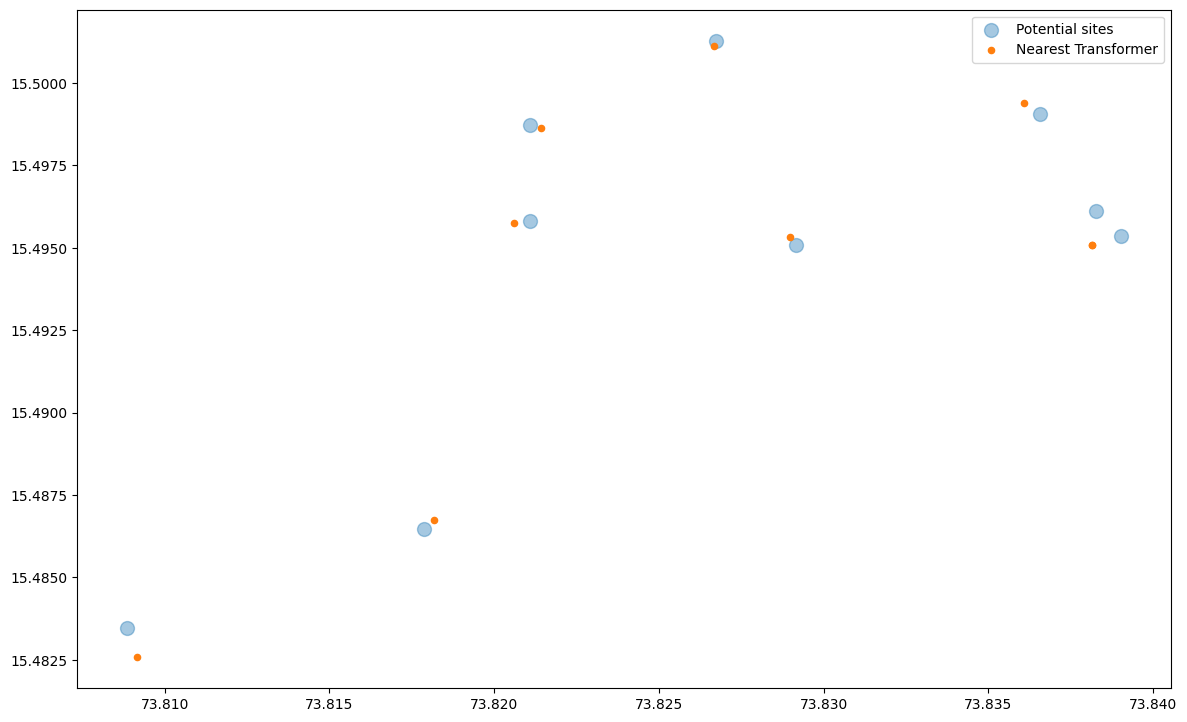

In [ ]:
show_map("panaji","abc124")